# Dataset

In [21]:
import numpy as np
import pandas as pd

np.random.seed(42)
n_samples = 100_000
n_features = 10

# features
X = np.random.normal(0, 1, (n_samples, n_features))

# Linear
y1 = 3*X[:,0] - 2*X[:,1] + 0.5*X[:,2]**2 + np.random.normal(0, 0.5, n_samples)
y2 = -X[:,3] + 4*np.sin(X[:,4]) + np.random.normal(0, 0.3, n_samples)

# Binary
y3 = ((X[:,0] + X[:,1]*0.5 - X[:,2]) > 0).astype(int)

# Multi class
y4 = np.digitize(X[:,3] + X[:,6]*0.5, bins=[-1, -0.5, 0, 0.5, 1])

print("X shape:", X.shape)
print("y1 shape:", y1.shape)
print("y2 shape:", y2.shape)
print("y3 shape:", y3.shape)
print("y4 shape:", y4.shape)

X shape: (100000, 10)
y1 shape: (100000,)
y2 shape: (100000,)
y3 shape: (100000,)
y4 shape: (100000,)


In [23]:
import pandas as pd

feature_cols = [f"f{i+1}" for i in range(n_features)]
df = pd.DataFrame(X, columns=feature_cols)
df["y1_regression"] = y1
df["y2_regression"] = y2
df["y3_binary"] = y3
df["y4_multiclass"] = y4
df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,y1_regression,y2_regression,y3_binary,y4_multiclass
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,2.061007,-2.472217,0,5
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,-0.490273,-2.239085,0,0
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,5.429092,-0.250855,1,0
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,-5.409542,4.032281,1,1
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,2.311656,-4.125321,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.439438,1.567690,2.706701,1.290374,-0.249232,-1.213565,1.004865,0.798699,0.185293,-0.218596,-0.965356,-2.059329,0,5
99996,-1.113334,-0.066161,0.863912,-0.577806,0.802532,0.280589,-0.164120,-0.326454,-1.201037,-0.795385,-3.440918,2.954657,0,1
99997,0.314581,0.651666,-1.253878,0.866073,0.186475,0.081632,-0.047342,-0.480885,-1.240456,-1.101874,0.289708,0.590887,1,4
99998,0.437076,-0.716748,-0.553240,0.762032,-0.241785,0.409155,0.147610,1.335328,-0.458095,1.385874,2.769064,-1.880963,1,4


# Preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
y4_encoded = encoder.fit_transform(df[["y4_multiclass"]])
y4_encoded_df = pd.DataFrame(
    y4_encoded,
    columns=encoder.get_feature_names_out(["y4_multiclass"]),
    index=df.index
)
df = pd.concat([df.drop(columns=["y4_multiclass"]), y4_encoded_df], axis=1)
df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,y1_regression,y2_regression,y3_binary,y4_multiclass_1,y4_multiclass_2,y4_multiclass_3,y4_multiclass_4,y4_multiclass_5
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,2.061007,-2.472217,0,0.0,0.0,0.0,0.0,1.0
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,-0.490273,-2.239085,0,0.0,0.0,0.0,0.0,0.0
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,5.429092,-0.250855,1,0.0,0.0,0.0,0.0,0.0
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,-5.409542,4.032281,1,1.0,0.0,0.0,0.0,0.0
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,2.311656,-4.125321,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.439438,1.567690,2.706701,1.290374,-0.249232,-1.213565,1.004865,0.798699,0.185293,-0.218596,-0.965356,-2.059329,0,0.0,0.0,0.0,0.0,1.0
99996,-1.113334,-0.066161,0.863912,-0.577806,0.802532,0.280589,-0.164120,-0.326454,-1.201037,-0.795385,-3.440918,2.954657,0,1.0,0.0,0.0,0.0,0.0
99997,0.314581,0.651666,-1.253878,0.866073,0.186475,0.081632,-0.047342,-0.480885,-1.240456,-1.101874,0.289708,0.590887,1,0.0,0.0,0.0,1.0,0.0
99998,0.437076,-0.716748,-0.553240,0.762032,-0.241785,0.409155,0.147610,1.335328,-0.458095,1.385874,2.769064,-1.880963,1,0.0,0.0,0.0,1.0,0.0


In [72]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
feature_cols = [col for col in df.columns if col.startswith("f")]
target_cols = [col for col in df.columns if col.startswith("y")]

In [76]:
X = df[feature_cols]
y = df[target_cols]

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (70000, 10)
X_test shape: (30000, 10)
y_train shape: (70000, 8)
y_test shape: (30000, 8)


# Model

In [80]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

inputs = Input(shape=(X_train.shape[1],), name="features")
x = Dense(64, activation="relu")(inputs)
x = Dense(64, activation="relu")(x)

In [82]:
# Regression
reg_output = Dense(2, activation="linear", name="regression_output")(x)
# Binary
bin_output = Dense(1, activation="sigmoid", name="binary_output")(x)
#OneHot
multi_output = Dense(y_multi_train.shape[1], activation="sigmoid", name="multi_output")(x)

In [84]:
model = Model(inputs=inputs, outputs=[reg_output, bin_output, multi_output])

In [86]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss={
        "regression_output": "mse",
        "binary_output": "binary_crossentropy",
        "multi_output": "binary_crossentropy"
    },
    metrics={
        "regression_output": ["mse"],
        "binary_output": ["accuracy"],
        "multi_output": ["accuracy"]
    }
)

In [88]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ features (InputLayer)         │ (None, 10)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 64)                │             704 │ features[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (None, 64)                │           4,160 │ dense_10[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ regression_output (Dense)     │ (None, 2)                 │             130 │ dense_11[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ binary_output (Dense)         │ (None, 1)                 │              65 │ dense_11[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_output (Dense)          │ (None, 5)                 │             325 │ dense_11[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 5,384 (21.03 KB)

 Trainable params: 5,384 (21.03 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
history = model.fit(
    X_train,
    {
        "regression_output": y_reg_train,
        "binary_output": y_bin_train,
        "multi_output": y_multi_train
    },
    validation_data=(
        X_test,
        {
            "regression_output": y_reg_test,
            "binary_output": y_bin_test,
            "multi_output": y_multi_test
        }
    ),
    epochs=50,
    batch_size=16      
)

Epoch 1/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - binary_output_accuracy: 0.9681 - binary_output_loss: 0.0932 - loss: 0.9417 - multi_output_accuracy: 0.6510 - multi_output_loss: 0.3140 - regression_output_loss: 0.5345 - regression_output_mse: 0.5345 - val_binary_output_accuracy: 0.9776 - val_binary_output_loss: 0.0486 - val_loss: 0.4776 - val_multi_output_accuracy: 0.9035 - val_multi_output_loss: 0.1762 - val_regression_output_loss: 0.2528 - val_regression_output_mse: 0.2528
Epoch 2/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - binary_output_accuracy: 0.9890 - binary_output_loss: 0.0280 - loss: 0.3725 - multi_output_accuracy: 0.9495 - multi_output_loss: 0.1119 - regression_output_loss: 0.2325 - regression_output_mse: 0.2325 - val_binary_output_accuracy: 0.9882 - val_binary_output_loss: 0.0275 - val_loss: 0.3060 - val_multi_output_accuracy: 0.9678 - val_multi_output_loss: 0.0743 - val_regression_output_loss: 0.2042 - val_regression_output_mse: 0.2042
Epoch 3/50
4375/4375 ━━━━━

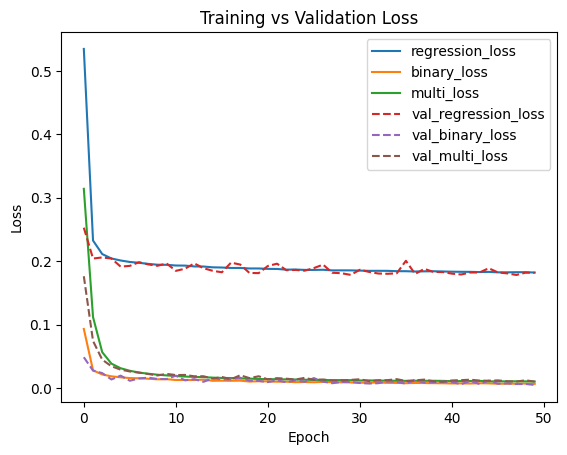

In [92]:
import matplotlib.pyplot as plt

# Loss
plt.plot(history.history['regression_output_loss'], label='regression_loss')
plt.plot(history.history['binary_output_loss'], label='binary_loss')
plt.plot(history.history['multi_output_loss'], label='multi_loss')
plt.plot(history.history['val_regression_output_loss'], '--', label='val_regression_loss')
plt.plot(history.history['val_binary_output_loss'], '--', label='val_binary_loss')
plt.plot(history.history['val_multi_output_loss'], '--', label='val_multi_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.show()

In [94]:
y_reg_pred, y_bin_pred, y_multi_pred = model.predict(X_test)

y_bin_pred_class = (y_bin_pred > 0.5).astype(int)
y_multi_pred_class = (y_multi_pred > 0.5).astype(int)

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [98]:
from sklearn.metrics import mean_squared_error, accuracy_score

# Regression
print("y1 MSE:", mean_squared_error(y_reg_test[:,0], y_reg_pred[:,0]))
print("y2 MSE:", mean_squared_error(y_reg_test[:,1], y_reg_pred[:,1]))

# Binary
print("y3 Accuracy:", accuracy_score(y_bin_test, y_bin_pred_class))

# OneHot
for i in range(y_multi_test.shape[1]):
    acc = accuracy_score(y_multi_test[:, i], y_multi_pred_class[:, i])
    print(f"y4_multiclass_{i+1} Accuracy:", acc)

y1 MSE: 0.26501945242368075
y2 MSE: 0.09836250943761327
y3 Accuracy: 0.9980333333333333
y4_multiclass_1 Accuracy: 0.9947666666666667
y4_multiclass_2 Accuracy: 0.9946333333333334
y4_multiclass_3 Accuracy: 0.9965
y4_multiclass_4 Accuracy: 0.9949
y4_multiclass_5 Accuracy: 0.9976333333333334
